<center><h1> Uvod u podatkovnu znanost  </h1></center>
<center><h2> Zimski semestar - 2022 </h2></center> 
<center><h3> Lab 5</h3></center> 
<center><h3> </h3></center> 
<center><h3> Vizualizacija podataka 2</h3></center> 

Ovo je vježba o vizualizaciji podataka! Koristit će se uobičajene python biblioteke, Matplotlib i Seaborn za stvaranje učinkovitih i jasnih vizualizacija. Radit ćete na skupu podataka koji sadrži informacije o deset filmova s najvećom zaradom svake godine.

Ovo su vizualizacije koje će se napraviti, a koje ćete koristiti za rješavanje vježbe:
- [Histogram](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html)
- [Boxplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html)
- [Scatterplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)
- [Plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)
- [Jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)
- [Barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)
- [Violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)
- [Errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
- [Filled plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.fill_between.html)
- [Panels](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)
- [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

Osim Matplotliba i Searbona, postoji mnogo više resursa koji bi vam mogli biti korisni, na primjer:
- [ggplot](http://ggplot.yhathq.com/)
- [plotly](https://plotly.com/python/)
- [Geopy](https://geopy.readthedocs.io/en/stable/) te [Folium](https://python-visualization.github.io/folium/)

In [1]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 15.2 MB 2.6 MB/s            0:00:05��███████████████                | 7.7 MB 2.6 MB/s eta 0:00:03    | 10.4 MB 2.6 MB/s eta 0:00:02��█████████▋  | 14.1 MB 2.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, re
import seaborn as sns

episodes = pd.read_csv('simpsons_episodes.csv')

In [5]:
# extract some datetime variables
episodes['datetime'] = pd.to_datetime(episodes['original_air_date'])
episodes['datetime_year'] = episodes['datetime'].dt.year
episodes['datetime_month'] =episodes['datetime'].dt.month
episodes['datetime_day'] =episodes['datetime'].dt.day
episodes['datetime-MM-DD'] = episodes['datetime'].dt.strftime('%m-%d')

# 1. Tutorial: Korištenje biblioteke za vizualizaciju podataka

Koristit će se dataset blockbustera. Sažetak feature-a:

- *title*: Episode title
- *original_air_date*
- *production_code*
- *season*
- *number_in_season*
- *number_in_series*
- *us_viewers_in_millions*
- *views*
- *imdb_rating*
- *imdb_votes*
- *image_url*
- *video_url*

## Vizualizacija dviju kontinuiranih varijabli

- Je li se smanjivao IMDB rating i US views kroz godine
- Postoji mnogo načina kako se može ispitati odnos između dvije varijable. Najjednostavniji je dijagram scatterplot, koristeći plt.scatterplot()

Text(0, 0.5, 'IMDB rating')

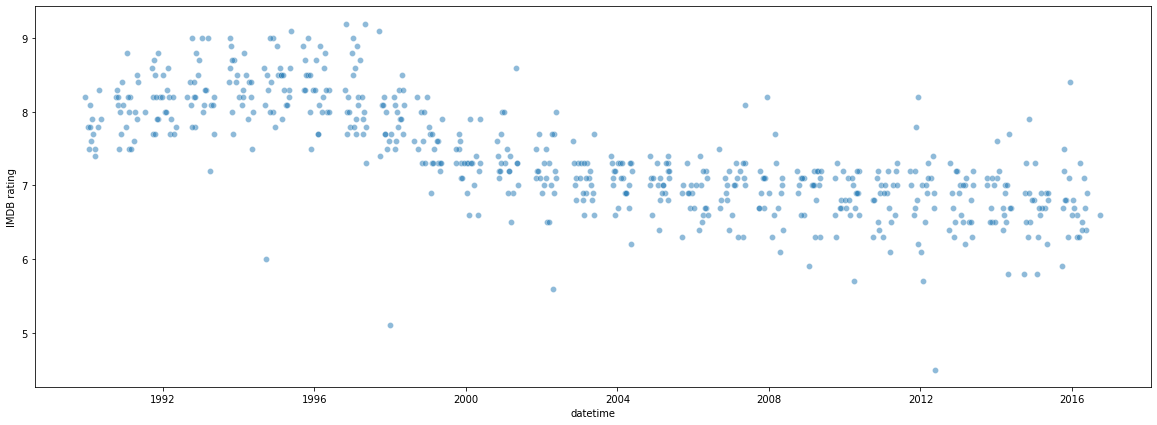

In [6]:
plt.figure(figsize=(20, 7))
# plt.scatter( episodes["datetime"], episodes["imdb_rating"], alpha=0.5)


sns.scatterplot(data=episodes, x="datetime",y="imdb_rating", alpha=0.5)
plt.xlabel("datetime")
plt.ylabel("IMDB rating")

## Vizualizacija dviju varijabli, kontinuiranih i kategoričkih

- Razmotrimo IMDB rating i US views kroz godine i sezone emitiranja
- Prikazat ćemo barplot, boxplot i violinplot. Seaborn nudi mnogo više uvjerljivih vizualizacija. Bacite oko na primjere: https://seaborn.pydata.org/examples/index.html

Text(0, 0.5, 'IMDB rating')

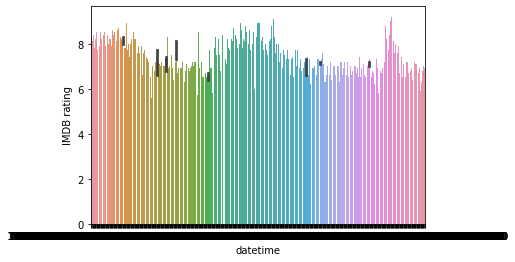

In [7]:
# barplot

sns.barplot(data=episodes, x="datetime",y="imdb_rating")
plt.xlabel("datetime")
plt.ylabel("IMDB rating")



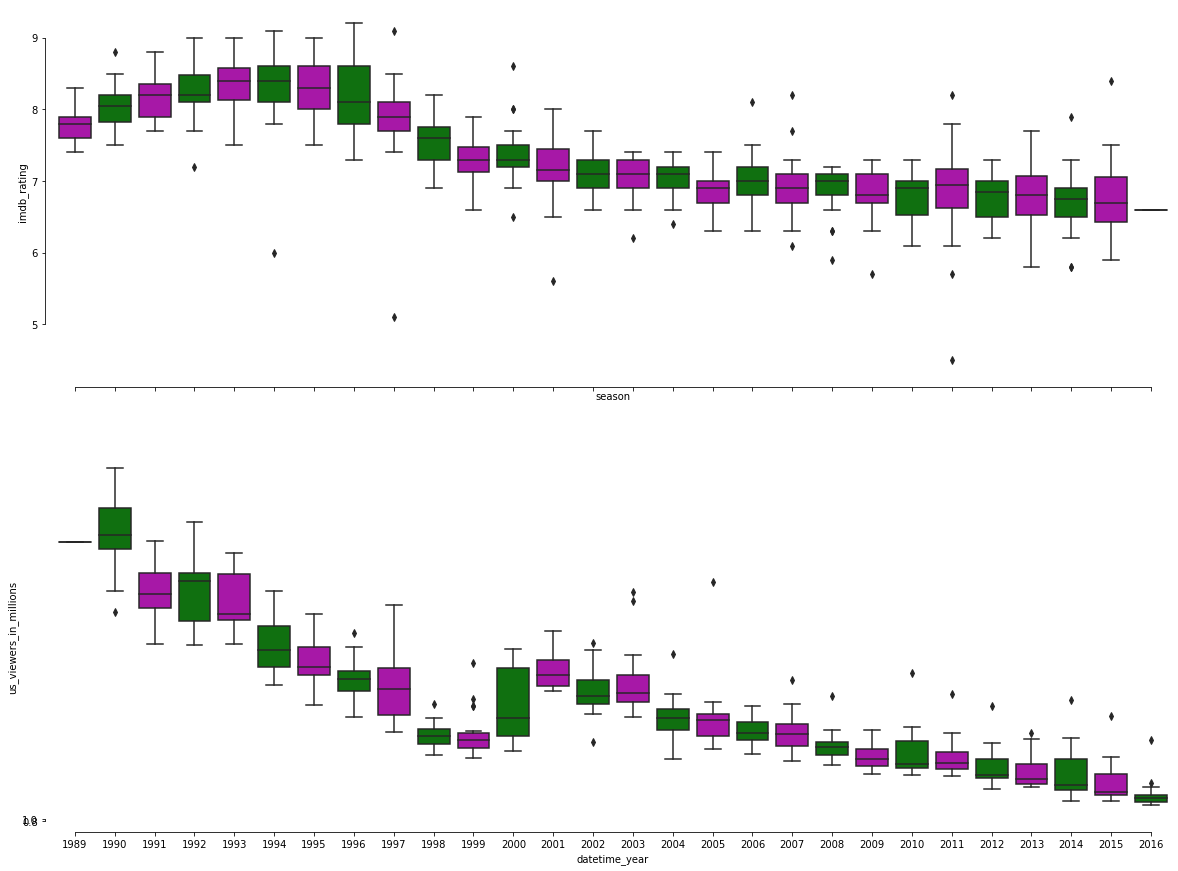

In [13]:
# boxplot

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 15), sharex=True)

sns.boxplot(x="season", y="imdb_rating",
            palette=["m", "g"],
            data=episodes, ax=ax1)
sns.despine(offset=10, trim=True)

sns.boxplot(x="datetime_year", y="us_viewers_in_millions",
            palette=["m", "g"],
            data=episodes, ax=ax2)
sns.despine(offset=10, trim=True)

Text(0, 0.5, 'IMDB rating')

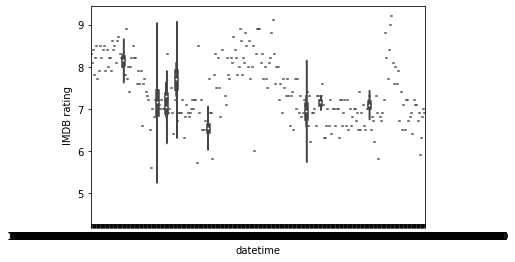

In [9]:
# violinplot
sns.violinplot(data=episodes, x="datetime",y="imdb_rating")
plt.xlabel("datetime")
plt.ylabel("IMDB rating")

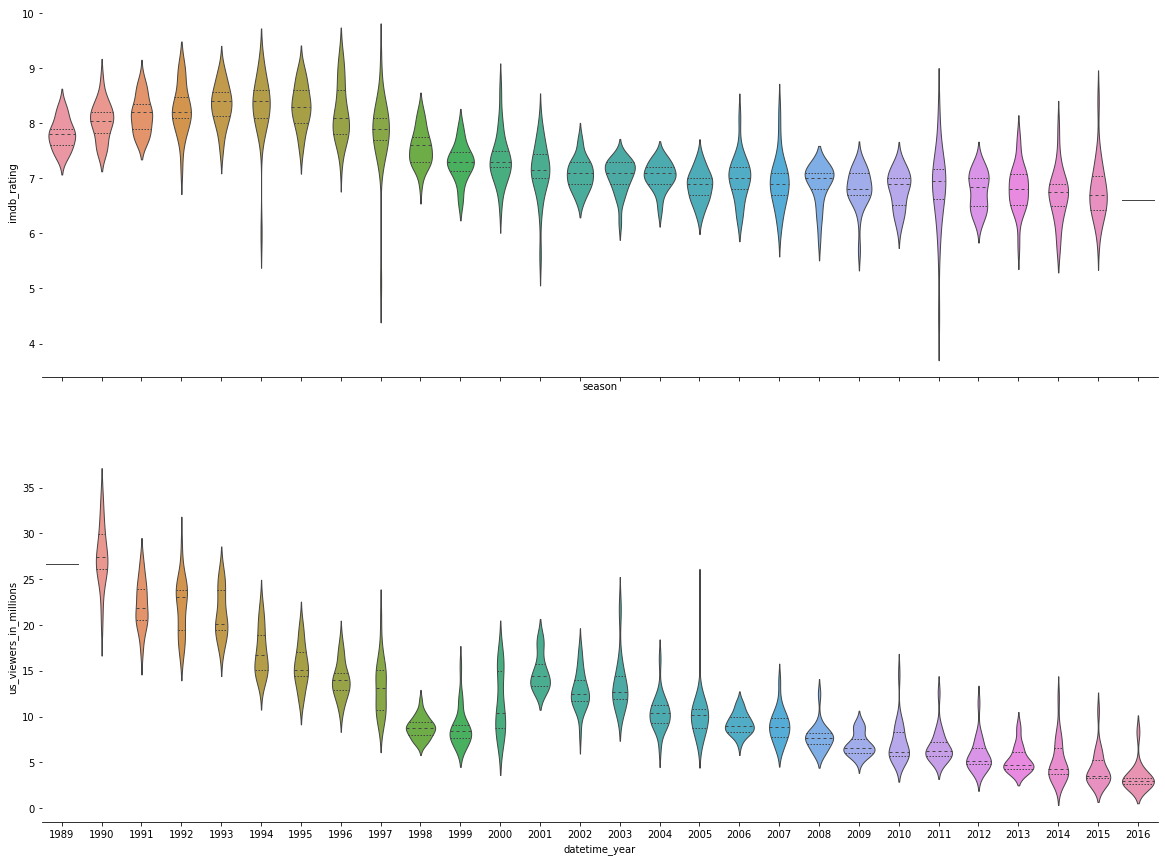

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 15), sharex=True)

sns.violinplot(x="season", y="imdb_rating",
            split=True, inner="quart", linewidth=1,
            data=episodes, ax=ax1)
sns.despine(left=True)

sns.violinplot(x="datetime_year", y="us_viewers_in_millions",
            split=True, inner="quart", linewidth=1,
            data=episodes, ax=ax2)
sns.despine(left=True)

# 2. Vježbe: Izrada naprednijih vizualizacija

Da bismo napravili dobru vizualizaciju podataka, prvo trebamo imati jasnu ideju o tome što želimo vizualizirati! Objedinjujemo li podatke i kako? Koja bi količina trebala biti na različitim osima? Kako koristiti boje i veličine predmeta? Često pomaže ručno skicirati vizualizaciju prije nego što je kodirate.

U sljedećoj vježbi dobit ćete opise vizualizacija koje bi mogle biti korisne za razumijevanje skupa podataka o filmovima.

## 2.1 Heatmape

- Vizualizirajte IMDB i US views kroz sezone te koristite funkciju Seaborn heatmap te funkciju *pivot* of pandasa

- Konačno, heatmapom možemo predstaviti tri varijable, kodiranjem treće varijable bojom. Pokažite kako sa sezonom opada IMDB ocjena i US views korištenjem heatmape


In [10]:
import plotly.figure_factory as ff

<AxesSubplot:xlabel='season', ylabel='number_in_season'>

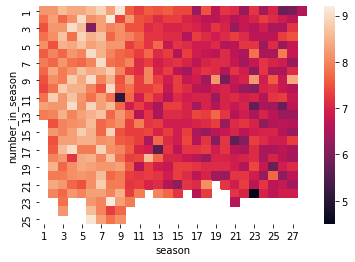

In [11]:
# Napišite svoj kod ovdje da biste kreirali prvu heatmapu
# Load the example flights dataset and convert to long-form
#flights_long = sns.load_dataset("flights")
#flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
#f, ax = plt.subplots(figsize=(9, 6))
#sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

episodes_df=episodes.pivot("number_in_season","season","imdb_rating")
episodes_df.index
#fig=ff.create_annotated_heatmap(z=episodes_df.to_numpy(), colorscale='Viridis')
#fig.show()
sns.heatmap(episodes_df)

<AxesSubplot:xlabel='season', ylabel='us_viewers_in_millions'>

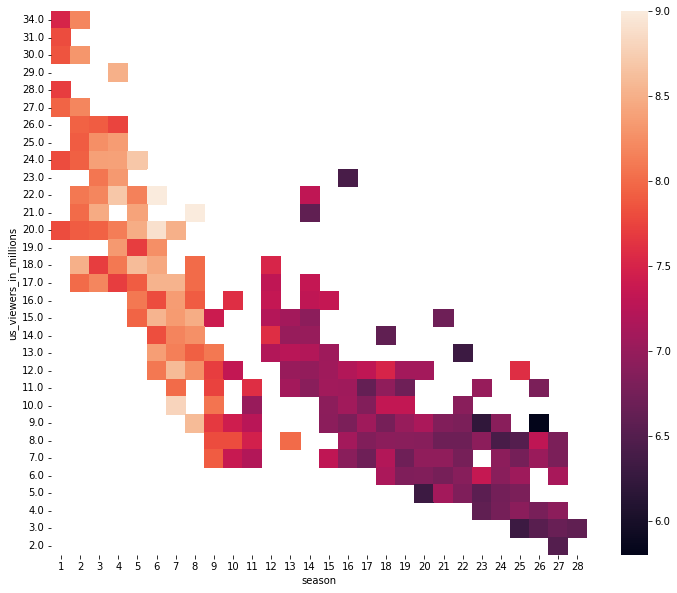

In [15]:
# Napišite svoj kod ovdje da biste kreirali drugu heatmapu


plt.figure(figsize=(12, 10))
episodes_df=episodes.round({'us_viewers_in_millions': 0})
episodes_df = pd.crosstab(episodes_df["us_viewers_in_millions"],episodes_df["season"], values= episodes_df["imdb_rating"], aggfunc="mean")
episodes_df.sort_index(axis=0, ascending=False, inplace=True)
sns.heatmap(episodes_df)

